<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Trabajo final de master</p>
<p style="margin: 0; text-align:right;">Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Estado de la computación cuántica en el aprendizaje por refuerzo y cómo aplicarla en DQN y Reinforce con Línea Base

## QVC aplicado a DQN en entorno CartPole



Se importan las librerías necesarias para ejecutar el Jupyter Notebook

In [1]:
# Importamos timeit para tomar mediciones de tiempo de ejecución
import timeit

# Importamos codecarbon para tomar medidas de huella de carbono
from codecarbon import EmissionsTracker

In [2]:
import sys
# Para importar nuestras librerías, que están en otro directorio
sys.path.append("../librerias")

# Librería con circuito cuántico definido
import QVC

# Modelos de aprendizaje por refuerzo
import Model

# Experience Replay Buffer para DQN
import experienceReplayBuffer as erb

# Agentes
import Agent

In [3]:
# Se importa la librería gymnasium para utilizar los entornos CartPole y Acrobot
import gym as gym

Se crea el entorno, en este caso CartPole

In [4]:
env = gym.envs.make("CartPole-v0")

/Users/marcoemiliorodriguezserrano/anaconda3/lib/python3.10/site-packages/gym/envs/registration.py:592: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/Users/marcoemiliorodriguezserrano/anaconda3/lib/python3.10/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/Users/marcoemiliorodriguezserrano/anaconda3/lib/python3.10/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Se definen los hiperparámetros que se utilizarán en el modelo de aprendizaje por refuerzo

In [5]:
# Hiperparámetros del modelo de aprendizaje por refuerzo
lr = 0.001            #Velocidad de aprendizaje
lr_input=0.001
lr_output=0.001
MEMORY_SIZE = 10000  #Máxima capacidad del buffer
MAX_EPISODES = 5000   #Número máximo de episodios (el agente debe aprender antes de llegar a este valor)
EPSILON = 1           #Valor inicial de epsilon
EPSILON_DECAY = .99   #Decaimiento de epsilon
GAMMA = 0.99          #Valor gamma de la ecuación de Bellman
BATCH_SIZE = 64       #Conjunto a coger del buffer para la red neuronal
BURN_IN = 1000        #Número de episodios iniciales usados para rellenar el buffer antes de entrenar
DNN_UPD = 30          #Frecuencia de actualización de la red neuronal
DNN_SYNC = 100     #Frecuencia de sincronización de pesos entre la red neuronal y la red objetivo

Se definen los hiperparámetros del circuito QVC

In [6]:
# Hiperparámetros del QVC
n_layers = 5    # número de capas del Ansatz
n_qubits = 4    # qubits definidos, en este caso son 4 al disponer de 4 variables de observación
n_actions = 2   # número de acciones, se definen 2 para Cartpole
environment = 0 # entorno Cartpole
quantum_device = "default.qubit" # dispositivo cuántico, se define un simulador cuántico

Se crea el buffer de repetición de experiencias

In [7]:
buffer = erb.experienceReplayBuffer(memory_size=MEMORY_SIZE, burn_in=BURN_IN)   # buffer experience replay

Se define el circuito cuántico que sustituye a la red neuronal

In [8]:
net = QVC.QuantumNet(n_layers, n_qubits, n_actions, environment, quantum_device)

Se crea la red objetivo también como un circuito cuántico

In [9]:
target_network = QVC.QuantumNet(n_layers, n_qubits, n_actions, environment, quantum_device)

Se crea el modelo DQN

In [10]:
dqn = Model.DQN(env, net, learning_rate=lr, lr_input=lr_input, lr_output=lr_output)

Se crea el modelo DQN objetivo

In [11]:
dqn_target = Model.DQN(env, target_network, learning_rate=lr, lr_input=lr_input, lr_output=lr_output)

Se crea el agente, se le pasa como parámetro los dos modelos inicializados que contienen un circuito cuántico

In [12]:
agent = Agent.DQNAgent(env, dqn, dqn_target, buffer, EPSILON, EPSILON_DECAY, BATCH_SIZE)

Se prepara el entorno para iniciar las mediciones de CO2

In [13]:
# Se define la carpeta de salida de los archivos de emisiones
output_dir = './emisiones/emisiones_QVC_DQN_CartPole'

# Se crea una instancia de EmissionsTracker y se configura la carpeta de salida
tracker = EmissionsTracker(output_dir=output_dir, log_level = "critical")

# Se inicializa el seguimiento de las emisiones
tracker.start()

Iniciamos el cronómetro para medir el tiempo del proceso

In [14]:
tiempo_inicio = timeit.default_timer()

Se inicia el entrenamiento del agente

In [15]:
agent.train(gamma=GAMMA, max_episodes=MAX_EPISODES,
              batch_size=BATCH_SIZE, dnn_update_frequency=DNN_UPD, dnn_sync_frequency=DNN_SYNC)

Rellenando el buffer de repetición...
Entrenando...
Episodio 2750 Recompensa media 164.10 Epsilon 0.01		18606165716			

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2778 Recompensa media 166.35 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2780 Recompensa media 166.98 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2789 Recompensa media 167.63 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2791 Recompensa media 167.33 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2794 Recompensa media 166.77 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2797 Recompensa media 166.79 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2799 Recompensa media 166.60 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc
ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2800 Recompensa media 166.71 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2801 Recompensa media 166.97 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2803 Recompensa media 165.75 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2806 Recompensa media 165.81 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2808 Recompensa media 167.36 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2812 Recompensa media 168.85 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2814 Recompensa media 169.06 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2815 Recompensa media 169.31 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2817 Recompensa media 168.52 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc
ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2820 Recompensa media 169.79 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2821 Recompensa media 170.06 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2822 Recompensa media 170.21 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2825 Recompensa media 169.22 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc
ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2835 Recompensa media 167.56 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2839 Recompensa media 168.67 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2840 Recompensa media 169.22 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2841 Recompensa media 169.65 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2842 Recompensa media 170.11 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc
ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2844 Recompensa media 169.14 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2847 Recompensa media 168.25 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2848 Recompensa media 168.85 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2850 Recompensa media 167.49 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2853 Recompensa media 168.05 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2864 Recompensa media 170.04 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2865 Recompensa media 170.04 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2868 Recompensa media 170.94 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2869 Recompensa media 171.49 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2874 Recompensa media 172.94 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2875 Recompensa media 173.39 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc
ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2876 Recompensa media 173.64 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc
ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2877 Recompensa media 174.11 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc
ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2878 Recompensa media 174.56 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2880 Recompensa media 174.56 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2881 Recompensa media 174.73 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc
ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2882 Recompensa media 175.12 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2886 Recompensa media 176.68 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc
ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2892 Recompensa media 179.02 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2893 Recompensa media 179.68 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2894 Recompensa media 180.15 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc
ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2895 Recompensa media 180.59 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc
ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2897 Recompensa media 180.97 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2898 Recompensa media 181.26 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc
ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2899 Recompensa media 181.62 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2900 Recompensa media 181.84 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc
ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc
ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2901 Recompensa media 181.84 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2910 Recompensa media 183.99 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2911 Recompensa media 184.28 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2914 Recompensa media 185.60 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2925 Recompensa media 188.95 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2927 Recompensa media 188.65 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc
ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2928 Recompensa media 188.65 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2933 Recompensa media 192.84 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2943 Recompensa media 194.21 Epsilon 0.01		

ERROR: EnergyDriver_executeCommands [via readSample] returned 0xe00002bc


Episodio 2944 Recompensa media 195.56 Epsilon 0.01		
El entorno se resolvió en 2944 episodios!


Se calcula el tiempo de ejecución, lo que ha tardado el agente en entrenar

In [16]:
tiempo_ejecucion = round(timeit.default_timer() - tiempo_inicio, 0)
print("Tiempo ejecución entrenamiento: " + str(int(tiempo_ejecucion/3600))
      + " horas, " + str(int((tiempo_ejecucion % 3600)/60)) + " minutos y "
      + str(int((tiempo_ejecucion % 3600)%60)) + " segundos")


Tiempo ejecución entrenamiento: 18 horas, 18 minutos y 8 segundos


Se calculan las emisiones que han podido implicar el proceso

In [17]:
emisiones = tracker.stop()
print("Emisiones de CO2 (Kg)" + str(emisiones))

Emisiones de CO2 (Kg)0.03872655477183761


Se procede a graficar los resultados

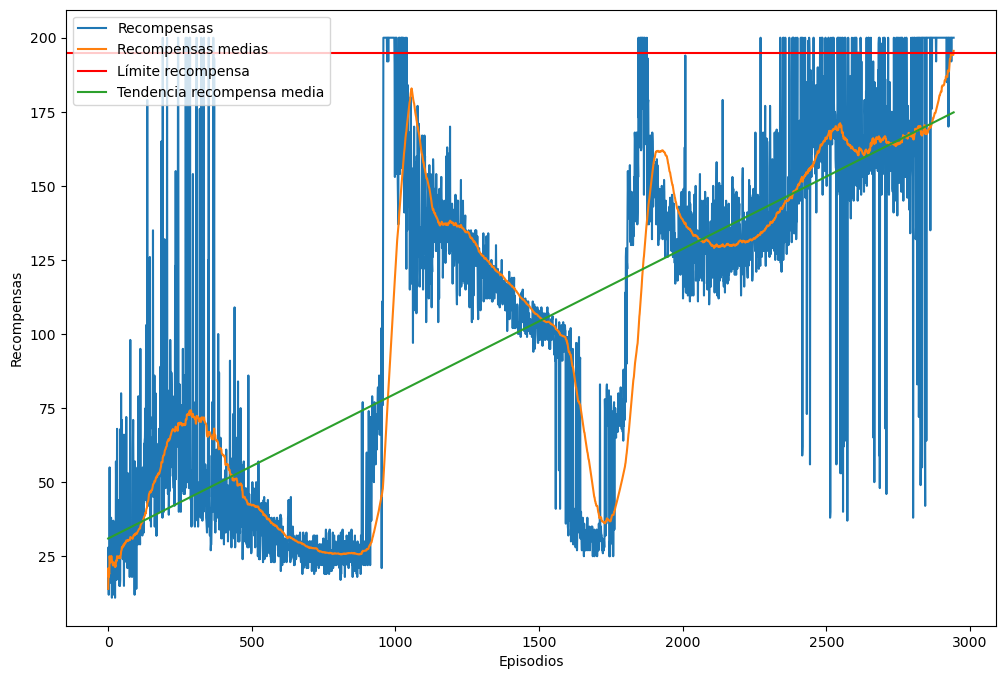

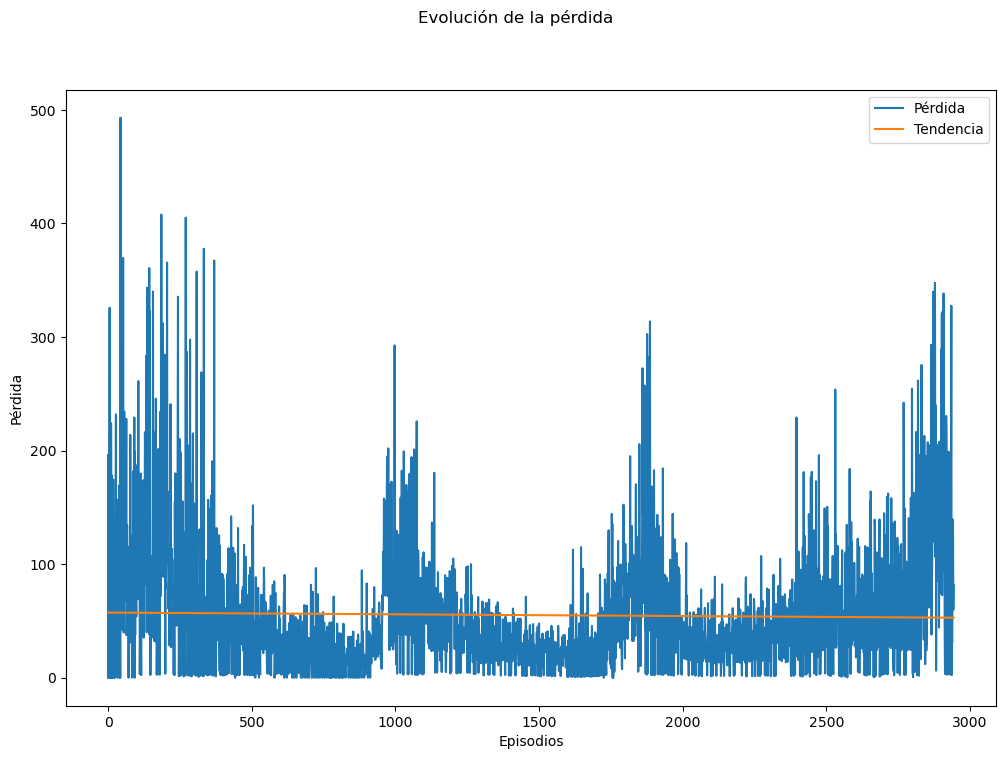

In [18]:
agent.plot_rewards()
agent.plot_loss()

In [27]:
import numpy as np
np.savetxt('./resultados_ejecuciones/T2_QVC_DQN_CartPole_param2_tr.txt', agent.training_rewards)
np.savetxt('./resultados_ejecuciones/T2_QVC_DQN_CartPole_param2_mean_tr.txt', agent.mean_training_rewards)
np.savetxt('./resultados_ejecuciones/T2_QVC_DQN_CartPole_param2_loss.txt', agent.training_loss)